# Problem statement

There is a Grocery Store/Super Market that has several stores/outlets around the world, they want to predict the sales to draw some insights that what are the products that sells the most. This helps the sales team to understand which product to sell and which product to promote and such kinds of things. They can also make several marketing plans such as why a particular product in particular store is selling the most. They can draw insights from it which helps the company to take better marketing decisions

This is a Regression based Machine Learning Project

# Work Flow

1. Data Collection -> Using Big Mart Sales Data to identify what are the different features this dataset contains
2. Data Preprocessing -> involves some data cleaning & making data compatiable by data encoding
3. Data Analysis -> to understand the insights of the data, what is this data all about and other such kind of things
4. Data splitting -> training data & test data
5. Model Selection -> XG Boost Regressor, Linear Regression
6. Data Evaluation -> Using the test data

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection

In [2]:
data = pd.read_csv('Big_Mart_Sales.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.shape

(8523, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# checking for missing values in the dataset
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Data Preprocessing

In [6]:
# Handling the missing values

# Replacing the missing values of Item_Weight with mean of the values
data.Item_Weight.fillna(data.Item_Weight.mean(), inplace=True)

In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Replacing the missing values of Outlet_Size with mode of the values
mode_Outlet_Size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_Outlet_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [9]:
Outlet_size_missing_values = data.Outlet_Size.isnull()
Outlet_size_missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [10]:
data.loc[Outlet_size_missing_values,'Outlet_Size'] = data.loc[Outlet_size_missing_values,'Outlet_Type'].apply(lambda x: mode_Outlet_Size[x])

In [11]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
data.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

# Data Analysis

In [13]:
# Statistical measures of the dataset
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


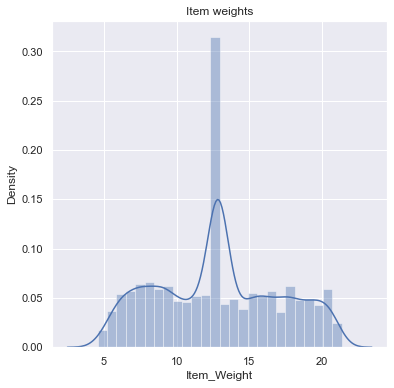

In [14]:
# distribution of Item_Weight values

sb.set()
plt.figure(figsize=(6,6))
sb.distplot(data.Item_Weight)
plt.title('Item weights')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


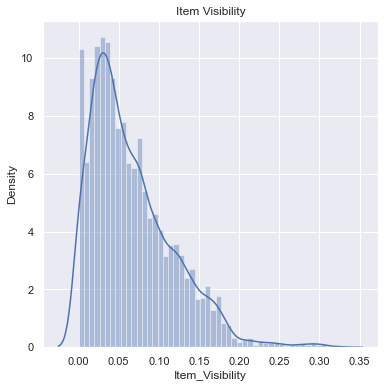

In [15]:
# distribution of Item_Visibility values
plt.figure(figsize=(6,6))
sb.distplot(data.Item_Visibility)
plt.title('Item Visibility')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


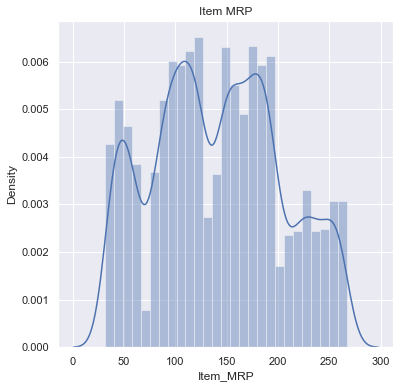

In [16]:
# distribution of Item_MRP values
plt.figure(figsize=(6,6))
sb.distplot(data.Item_MRP)
plt.title('Item MRP')
plt.show()

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


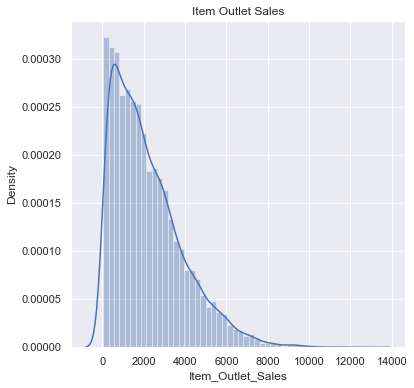

In [17]:
# distribution of Item_Outlet_Sales values
plt.figure(figsize=(6,6))
sb.distplot(data.Item_Outlet_Sales)
plt.title('Item Outlet Sales')
plt.show()

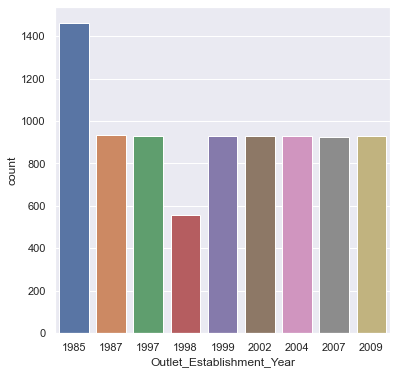

In [18]:
# distribution of Outlet_Establishment_Year values
plt.figure(figsize=(6,6))
sb.countplot(x='Outlet_Establishment_Year', data=data)
plt.show()

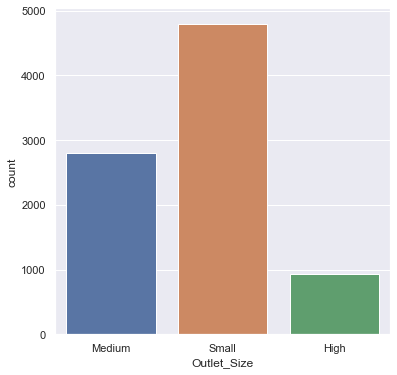

In [19]:
# distribution of Outlet_Size values
plt.figure(figsize=(6,6))
sb.countplot(x='Outlet_Size', data=data)
plt.show()

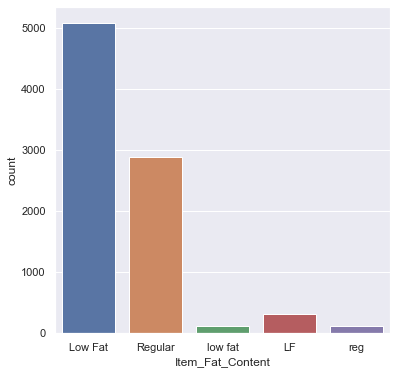

In [20]:
# distribution of Item_Fat_Content values
plt.figure(figsize=(6,6))
sb.countplot(x='Item_Fat_Content', data=data)
plt.show()

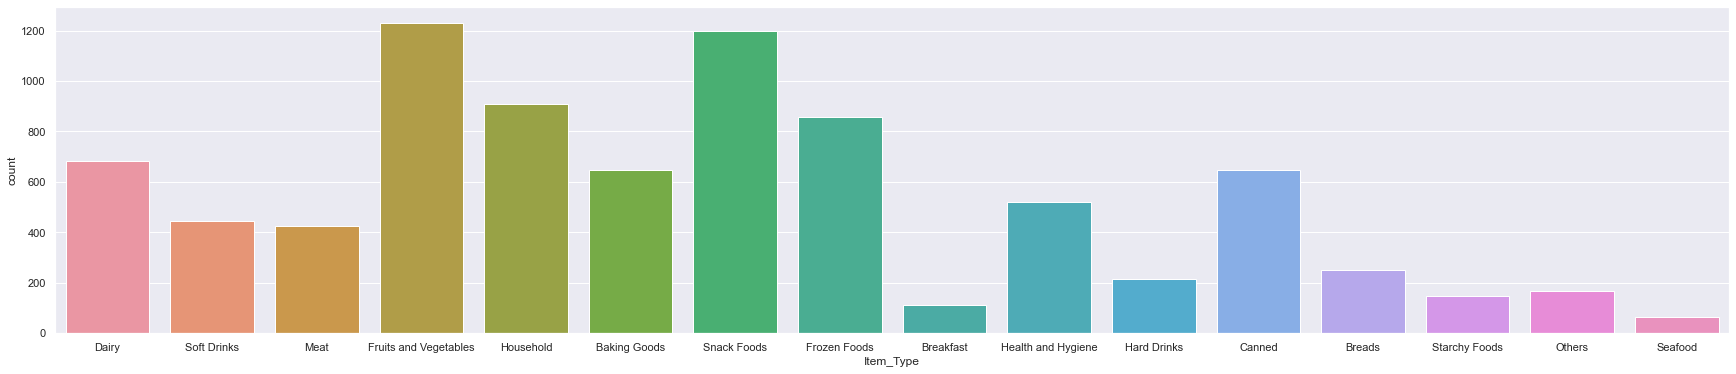

In [21]:
# distribution of Item_Type values
plt.figure(figsize=(30,6))
sb.countplot(x='Item_Type', data=data)
plt.show()

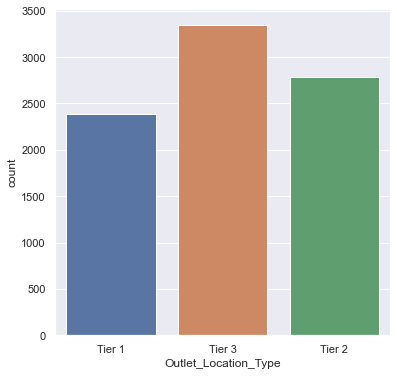

In [22]:
# distribution of Outlet_Location_Type values
plt.figure(figsize=(6,6))
sb.countplot(x='Outlet_Location_Type', data=data)
plt.show()

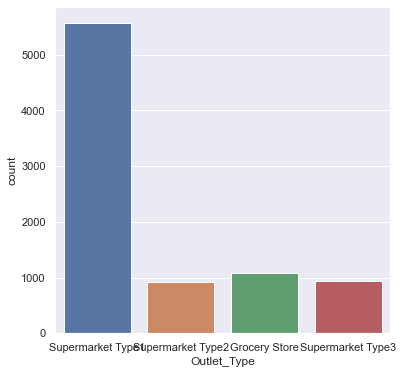

In [23]:
# distribution of Outlet_Type values
plt.figure(figsize=(6,6))
sb.countplot(x='Outlet_Type', data=data)
plt.show()

# Data Encoding

In [24]:
# label encoding
encoder = LabelEncoder()

In [25]:
data.Item_Identifier = encoder.fit_transform(data.Item_Identifier)

In [26]:
data.Item_Identifier

0        156
1          8
2        662
3       1121
4       1297
        ... 
8518     370
8519     897
8520    1357
8521     681
8522      50
Name: Item_Identifier, Length: 8523, dtype: int32

In [27]:
# Item Fat COntent
data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
data.replace({'Item_Fat_Content':{'Low Fat':'low fat','LF':'low fat','reg':'Regular'}}, inplace=True)

In [29]:
data.Item_Fat_Content.value_counts()

low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [30]:
data.Item_Fat_Content = encoder.fit_transform(data.Item_Fat_Content)
data.Item_Type = encoder.fit_transform(data.Item_Type)
data.Outlet_Identifier = encoder.fit_transform(data.Outlet_Identifier)
data.Outlet_Size = encoder.fit_transform(data.Outlet_Size)
data.Outlet_Location_Type = encoder.fit_transform(data.Outlet_Location_Type)
data.Outlet_Type = encoder.fit_transform(data.Outlet_Type)

In [31]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,0,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,0,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Data Splitting

In [32]:
x = data.iloc[:,:-1]
y = data.Item_Outlet_Sales

In [33]:
print(x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 1         0.016047   
1                   8        5.920                 0         0.019278   
2                 662       17.500                 1         0.016760   
3                1121       19.200                 0         0.000000   
4                1297        8.930                 1         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 1         0.056783   
8519              897        8.380                 0         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 0         0.145221   
8522               50       14.800                 1         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [34]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [35]:
# Splitting into training data & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [36]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# XGBoost Regressor

In [37]:
#loading the XGBoost model
model = XGBRegressor().fit(x_train,y_train)

In [38]:
# Prediction on training data
train_data_pred = model.predict(x_train)

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [39]:
# R squared Value for trainig data
R_sq_train = metrics.r2_score(y_train, train_data_pred)
print(R_sq_train)

0.8639680373364909


Model Evaluation - Testing the model

In [40]:
# Prediction on test data
test_data_pred = model.predict(x_test)

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [41]:
# R squared Value for test data
R_sq_test = metrics.r2_score(y_test, test_data_pred)
print(R_sq_test)

0.5233136709735687


# Linear Regression

In [42]:
# loading the Linear Regression Model
LR_model = LinearRegression().fit(x_train,y_train)

In [43]:
# Prediction on training data
LR_train_data_pred = LR_model.predict(x_train)

In [44]:
# R squared Value for trainig data
LR_R_sq_train = metrics.r2_score(y_train, LR_train_data_pred)
print(LR_R_sq_train)

0.5071929167339231


Testing the model

In [45]:
# Prediction on test data
LR_test_data_pred = LR_model.predict(x_test)

In [46]:
# R squared Value for test data
LR_R_sq_test = metrics.r2_score(y_test, LR_test_data_pred)
print(LR_R_sq_test)

0.48912987193626367


# Support Vector Machine Model

In [47]:
# Loading Support Vector Machine Model
from sklearn import svm
SVM_model = svm.SVR(kernel='linear').fit(x_train,y_train)

In [48]:
# Prediction on training data
SVM_train_data_pred = SVM_model.predict(x_train)

In [49]:
# R squared Value for trainig data
SVM_R_sq_train = metrics.r2_score(y_train, SVM_train_data_pred)
print(SVM_R_sq_train)

0.4813484977025243


Testing the model

In [50]:
# Prediction on test data
SVM_test_data_pred = SVM_model.predict(x_test)

In [51]:
# R squared Value for test data
SVM_R_sq_test = metrics.r2_score(y_test, SVM_test_data_pred)
print(SVM_R_sq_test)

0.45504640666040674


# Ridge Regression

In [52]:
from sklearn.linear_model import Ridge

In [53]:
# loading the Linear Regression Model
Ridge_model = Ridge().fit(x_train,y_train)

In [54]:
# Prediction on training data
Ridge_train_pred = Ridge_model.predict(x_train)

In [55]:
# R squared Value for trainig data
Ridge_R2_train = metrics.r2_score(y_train, Ridge_train_pred)
print(Ridge_R2_train)

0.5071870678120975


In [56]:
# Prediction on test data
Ridge_test_pred = Ridge_model.predict(x_test)

In [57]:
# R squared Value for test data
Ridge_R2_test = metrics.r2_score(y_test, Ridge_test_pred)
print(Ridge_R2_test)

0.4890436843287638


# Lasso Regression

In [58]:
from sklearn.linear_model import Lasso

In [59]:
# loading the Linear Regression Model
Lasso_model = Lasso().fit(x_train,y_train)

In [60]:
# Prediction on training data
Lasso_train_pred = Lasso_model.predict(x_train)

In [61]:
# R squared Value for trainig data
Lasso_R2_train = metrics.r2_score(y_train, Lasso_train_pred)
print(Lasso_R2_train)

0.5070485482878371


In [62]:
# Prediction on test data
Lasso_test_pred = Lasso_model.predict(x_test)

In [63]:
# R squared Value for test data
Lasso_R2_test = metrics.r2_score(y_test, Lasso_test_pred)
print(Lasso_R2_test)

0.488522481726848
